## Линейная классификация

# Урок 3. Классификация. Логистическая регрессия.
## ДЗ (29.04.2021 / 03.05.2021)

Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

Подробности в .ipynb файле

* [Практическое задание. ДЗ.](#ex)
    * [Задание](#ex)

* [Теория](#theor)
    * [Дополнительные материалы](#theor)

## <center><a class="anchor" id="ex">Практическое задание </a><center>

### <a class="anchor" id="ex1">Задание </a>

Домашнее задание: Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Логистическая регрессия

In [ ]:
def log_loss_and_grad(w, X, target):
    m = X.shape[0]
    y=(2*target-1)
    score=np.dot(X, w.T).flatten()

    # Рассчёт log_loss
    loss = np.sum(np.log(1+np.exp(-y*score)))/m

    # Рассчёт градиента
    Z=-y/(m*(1+np.exp(y*score)))
    grad=Z[np.newaxis, :].dot(X)
    return loss, grad


def optimize(w, X, y, n_iterations, eta):
    #     потери будем записывать в список для отображения в виде графика
    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss_and_grad(w, X, y)
        w = w - eta * grad
        losses.append(loss)

    return w, losses

def predict(w, X):
    y_predicted = np.zeros(X.shape[0])
    score=np.dot(X, w.T).flatten()
    Prob = 1/(1+np.exp(-score))

    #     За порог отнесения к тому или иному классу примем вероятность 0.5
    y_predicted[Prob>0.5]=1
    y_predicted[Prob<=0.5]=0

    return y_predicted

<Figure size 1440x576 with 0 Axes>

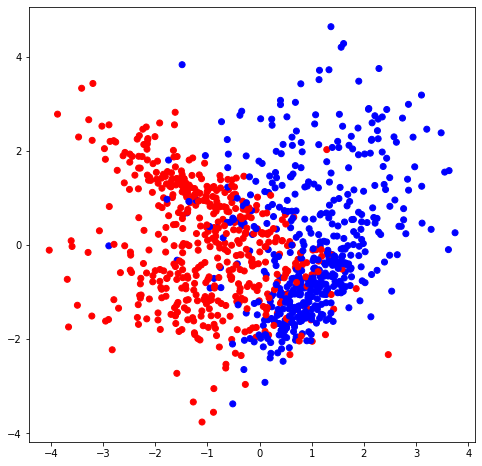

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# datasets.make_blobs(centers = 2, cluster_std = 1.5, random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(20, 8))
plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [ ]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (700, 2)
Размер массива ответов для обучающей выборки (700,)
Размер массива признаков тестовой выборки (300, 2)
Размер массива ответов для тестовой выборки (300,)


In [ ]:
w0 = np.zeros((1, X_train.shape[1]))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[2.11307493 0.19097496]]
Точность на обучающей выборке: 85.571
Точность на тестовой выборке: 83.667


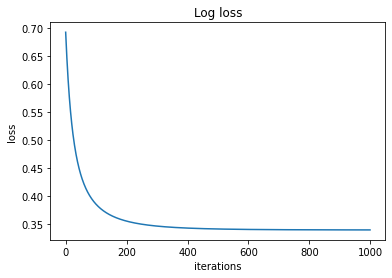

In [ ]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

In [ ]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool)
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [ ]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)
y_predicted_train = mod.predict(X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.03530579 0.00033222]]
Точность на обучающей выборке: 85.714
Точность на тестовой выборке: 84.333


In [ ]:
mod.w[0, 0]/np.sum(mod.w), w[0, 0]/np.sum(w)

(0.990677992576097, 0.9171133583157037)

## Методы оценки дискриминационной способности модели

In [ ]:
x = mod.predict_proba(X_test)
target = y_test

# for _x, t in zip(x, target):
#     print("Значение x:{0} класс {1}".format(_x, t))

В ходе оценки дискриминационной способности при помощи ROC и PR-анализа необходимо убедиться, что с возрастанием x чаще встречаются объекты положительного класса(в target обозначаются как 1) и реже отрицательного (в target обозначаются как 0).

In [ ]:
order=np.argsort(x)
target=target[order]
x=x[order]

Далее необходимо посчитать сколько объектов положительного и отрицательного класса относятся с тому или иному значению x. Поскольку повторяющихся x у нас нет, то относительно объектов положительного класса можно считать, что искомые значения это массив target, а для объектов негативного класса массив 1-target. Если бы у нас были повторяющиеся значения, мы бы должны были объединять и суммировать соответствующие ячейки в массивах.

In [ ]:
bins_pos=target
bins_neg=1-target
num_pos, num_neg=np.sum(bins_pos), np.sum(bins_neg)
print(f'{num_pos} объектов положительного класса, {num_neg} объектов негативного класса')

138 объектов положительного класса, 162 объектов негативного класса


При помощи cumsum мы может посчитать сколко всего объектов негативного класса мы посчитали объектами негативного класса при текущем значении порога

In [ ]:
# np.cumsum(bins_neg)

#Чувствительность, доля объектов негативного класса, которых при текущем значении предела
#правильно записали в негативный класс
TPR=np.concatenate([[0], np.cumsum(bins_neg)/num_neg])

#Ложно-позитивный уровень, доля объектов положительного класса, которых при текущем значении предела
#ошибочно записали в негативный класс
FPR=np.concatenate([[0], np.cumsum(bins_pos)/num_pos])

#
TPR

array([0.        , 0.00617284, 0.01234568, 0.01851852, 0.02469136,
       0.0308642 , 0.03703704, 0.04320988, 0.04938272, 0.05555556,
       0.0617284 , 0.06790123, 0.07407407, 0.08024691, 0.08641975,
       0.09259259, 0.09876543, 0.10493827, 0.11111111, 0.11728395,
       0.12345679, 0.12962963, 0.13580247, 0.14197531, 0.14814815,
       0.15432099, 0.16049383, 0.16666667, 0.17283951, 0.17901235,
       0.18518519, 0.19135802, 0.19753086, 0.2037037 , 0.20987654,
       0.21604938, 0.22222222, 0.22839506, 0.2345679 , 0.24074074,
       0.24691358, 0.25308642, 0.25925926, 0.2654321 , 0.27160494,
       0.27777778, 0.28395062, 0.29012346, 0.2962963 , 0.30246914,
       0.30864198, 0.31481481, 0.32098765, 0.32716049, 0.33333333,
       0.33950617, 0.34567901, 0.35185185, 0.35802469, 0.36419753,
       0.37037037, 0.37654321, 0.37654321, 0.38271605, 0.38888889,
       0.39506173, 0.40123457, 0.40123457, 0.40740741, 0.41358025,
       0.41975309, 0.42592593, 0.43209877, 0.4382716 , 0.44444

In [ ]:
#
FPR

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00724638, 0.00724638, 0.00724638,
       0.00724638, 0.00724638, 0.01449275, 0.01449275, 0.01449275,
       0.01449275, 0.01449275, 0.01449275, 0.01449275, 0.01449

ROC-кривая(FPR, TPR) должна начинаться в точке (0,0) и (1,1). Эти точки соответствуют двум крайним значениям: когда при данном значении предела либо ни один объект не предсказывается как объект негативного класса, и когда при данном значении предела все объекты предсказываются как объекты негативного класса.
В зависимости от того к какому классу причисляются объекты равные пределу, или, другими словами используем ли мы при отнесении объекта к классу сравнение его скора(или вероятности) с пределом через строгое или не строгое неравенство, у нас одна из этих двух точек может пропадать. Зная об этом факте мы можем добавить недостающую крайнюю точку к массивам. Собственно, для этого ранее и использовалось np.concatenate([[0], ...])

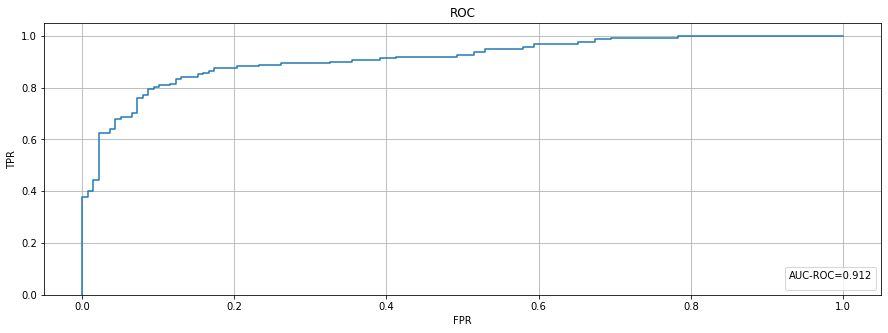

In [ ]:
AUC_ROC = np.sum((FPR[1:]-FPR[:-1])*(TPR[1:]+TPR[:-1])/2)

plt.figure(figsize=(15, 5))
plt.title('ROC')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR)

In [ ]:
precision=np.cumsum(bins_neg)/(np.cumsum(bins_neg)+np.cumsum(bins_pos))
# precision

In [ ]:
recall = TPR
recall

array([0.        , 0.00617284, 0.01234568, 0.01851852, 0.02469136,
       0.0308642 , 0.03703704, 0.04320988, 0.04938272, 0.05555556,
       0.0617284 , 0.06790123, 0.07407407, 0.08024691, 0.08641975,
       0.09259259, 0.09876543, 0.10493827, 0.11111111, 0.11728395,
       0.12345679, 0.12962963, 0.13580247, 0.14197531, 0.14814815,
       0.15432099, 0.16049383, 0.16666667, 0.17283951, 0.17901235,
       0.18518519, 0.19135802, 0.19753086, 0.2037037 , 0.20987654,
       0.21604938, 0.22222222, 0.22839506, 0.2345679 , 0.24074074,
       0.24691358, 0.25308642, 0.25925926, 0.2654321 , 0.27160494,
       0.27777778, 0.28395062, 0.29012346, 0.2962963 , 0.30246914,
       0.30864198, 0.31481481, 0.32098765, 0.32716049, 0.33333333,
       0.33950617, 0.34567901, 0.35185185, 0.35802469, 0.36419753,
       0.37037037, 0.37654321, 0.37654321, 0.38271605, 0.38888889,
       0.39506173, 0.40123457, 0.40123457, 0.40740741, 0.41358025,
       0.41975309, 0.42592593, 0.43209877, 0.4382716 , 0.44444

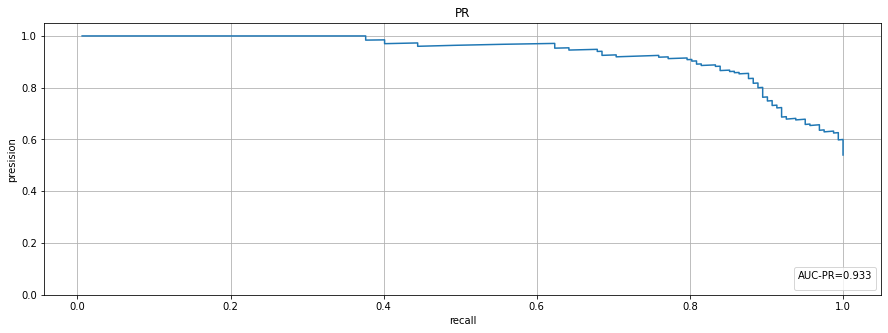

In [ ]:
AUC_PR = np.sum(precision*(recall[1:]-recall[:-1]))

plt.figure(figsize=(15, 5))
plt.title('PR')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)

## Домашнее задание:
Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

In [ ]:
proba=np.unique(mod.predict_proba(X_test))
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [ ]:
for p in proba[::40]:
    print("Для порога по вероятности {0} на тестовой выборке имеем:".format(p)+
      f" {confusion(mod.predict(X_test, p), target)}")

Для порога по вероятности 0.4664085247632536 на тестовой выборке имеем: {'TP': 138, 'FP': 161, 'FN': 0, 'TN': 1}
Для порога по вероятности 0.48565282094164963 на тестовой выборке имеем: {'TP': 117, 'FP': 142, 'FN': 21, 'TN': 20}
Для порога по вероятности 0.4902702766756748 на тестовой выборке имеем: {'TP': 95, 'FP': 124, 'FN': 43, 'TN': 38}
Для порога по вероятности 0.4951229135419965 на тестовой выборке имеем: {'TP': 81, 'FP': 98, 'FN': 57, 'TN': 64}
Для порога по вероятности 0.5012569986441655 на тестовой выборке имеем: {'TP': 62, 'FP': 77, 'FN': 76, 'TN': 85}
Для порога по вероятности 0.5060542217750293 на тестовой выборке имеем: {'TP': 43, 'FP': 56, 'FN': 95, 'TN': 106}
Для порога по вероятности 0.5110945397951218 на тестовой выборке имеем: {'TP': 25, 'FP': 34, 'FN': 113, 'TN': 128}
Для порога по вероятности 0.5176182099528329 на тестовой выборке имеем: {'TP': 9, 'FP': 10, 'FN': 129, 'TN': 152}


## Дополнительные материалы

1. [Функции потерь для классификации](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

2. Метод максимального правдоподобия: [Сложное описание](https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya) / [Простое описание](https://www.youtube.com/watch?v=2iRIqkm1mug)

3. [Встроенные датасеты Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

4. [numpy.trapz](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html)